# Random Forest 
**Random Forest** is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the class (for classification) or mean prediction (for regression) of the individual trees. It’s a highly flexible and powerful tool in machine learning, capable of handling both classification and regression tasks with a high degree of accuracy.

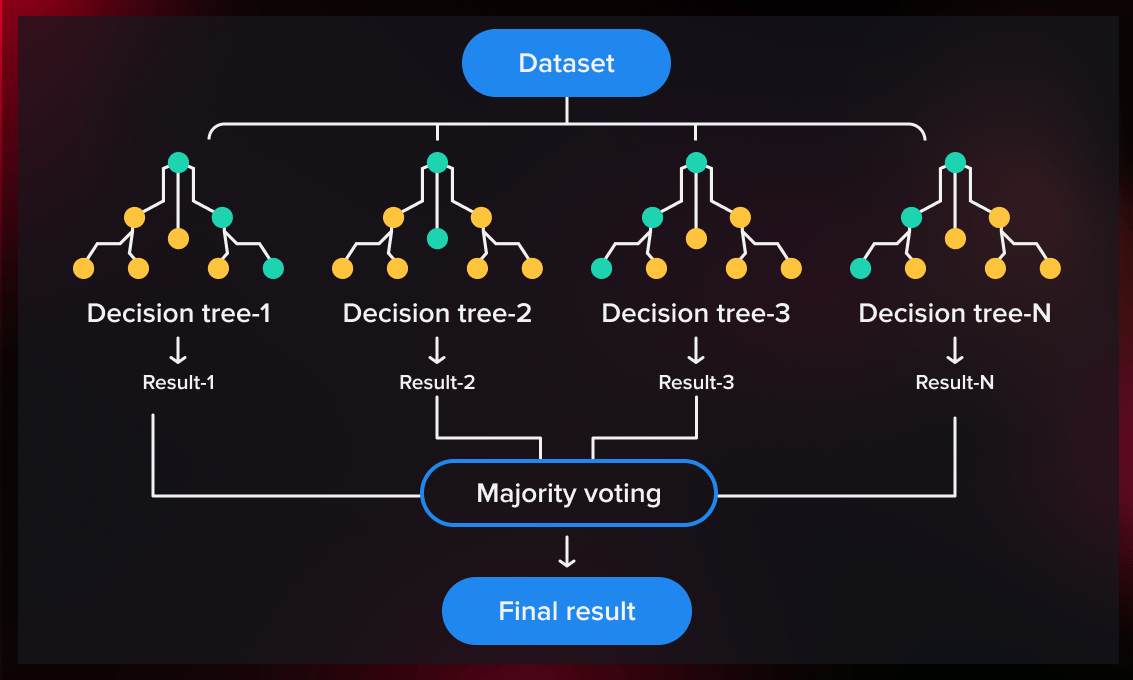

## How Random Forest Works

1. **Ensemble Learning**: The core idea behind Random Forest is **ensemble learning**, which combines the predictions of multiple models to improve the overall performance. In Random Forest, the "ensemble" consists of many decision trees, which are combined to produce a more accurate and stable prediction than any single tree could achieve on its own.

2. **Bootstrapping (Sampling)**: Random Forest uses a technique called **bootstrap aggregating**, or **bagging**. Here’s how it works:
   * Multiple subsets of the training data are created by randomly sampling with replacement. This means some data points may appear multiple times in a subset, while others may not appear at all.
   * Each decision tree in the Random Forest is trained on one of these subsets.
   * By training on different subsets, the trees become less correlated with each other, which reduces the overall variance and helps in avoiding overfitting.

3. **Random Feature Selection**:
   * When constructing each decision tree, Random Forest does not consider all the features at each split. Instead, it randomly selects a subset of features at each node.
   * This randomness further diversifies the trees, ensuring that no single feature dominates the model. It also helps in reducing the correlation between trees, which is key to the success of the ensemble method.

4. **Voting/Averaging**:
   * For classification tasks, each tree in the forest votes for a class, and the class that receives the most votes is chosen as the final prediction.
   * For regression tasks, the average of all the tree predictions is taken as the final output.
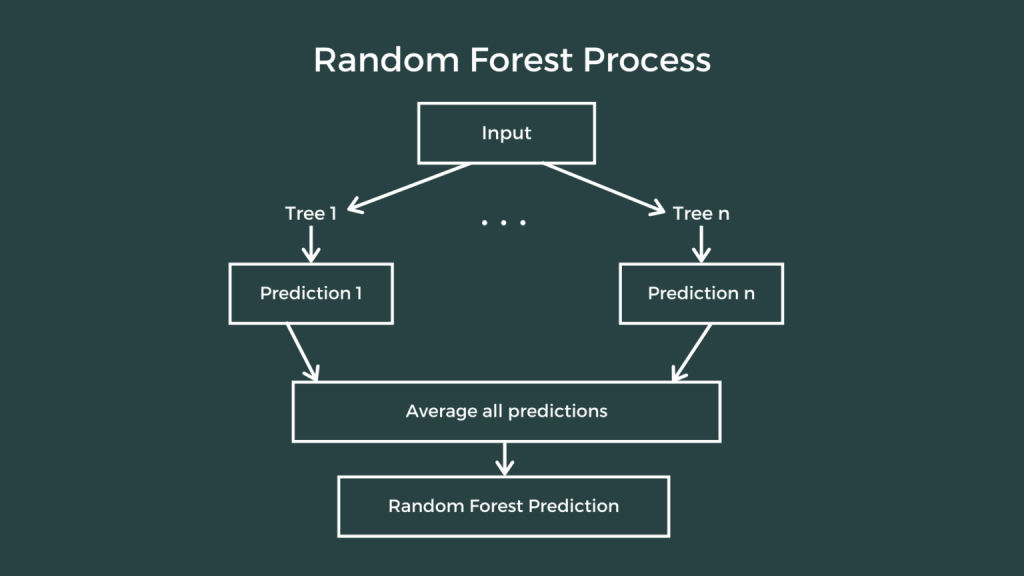
   * This aggregation process ensures that the model is more robust to overfitting and less sensitive to noisy data.


## Key Parameters of Random Forest

1. **`n_estimators`**:
   - **Definition**: The number of trees in the forest.
   - **Impact**: More trees generally improve the model's performance, as the predictions become more stable and less prone to overfitting. However, more trees also require more computational resources and time.
   - **Ideal Value**: Start with 100-200 trees. You can increase this number if the model's performance continues to improve with more trees, but remember the trade-off in computation time.

2. **`max_features`**:
   - **Definition**: The number of features considered at each split in a tree.
   - **Impact**: This parameter controls the diversity among the trees. Using fewer features at each split increases diversity but can lead to less optimal splits in each tree. Using more features reduces diversity but allows each tree to make more informed splits.
   - **Ideal Value**:
     - For classification: Typically `sqrt(total number of features)`.
     - For regression: Typically `total number of features/3`.
   - **Adjustment**: If the model is overfitting, try reducing the number of features considered (`max_features`). If the model is underfitting, increase it.

3. **`max_depth`**:
   - **Definition**: The maximum depth of each tree in the forest.
   - **Impact**: Limiting the depth of the trees prevents them from learning too much noise in the data, thus reducing overfitting. Shallower trees are less complex and have a lower risk of overfitting, but they may not capture all the patterns in the data.
   - **Ideal Value**: Start without a limit (`None`). If the model is overfitting, you can limit the depth of the trees.
   - **Adjustment**: If overfitting is an issue, reduce the `max_depth`. For highly complex data, allowing deeper trees might be necessary.

4. **`min_samples_split`**:
   - **Definition**: The minimum number of samples required to split an internal node.
   - **Impact**: This parameter controls how deep the trees can grow. Higher values prevent the model from creating small branches that capture noise in the data, reducing overfitting.
   - **Ideal Value**: The default is 2, meaning nodes will split if they have at least 2 samples. Increasing this value can help control overfitting.
   - **Adjustment**: Increase this value for noisy or large datasets to reduce overfitting.

5. **`min_samples_leaf`**:
   - **Definition**: The minimum number of samples that a leaf node must have.
   - **Impact**: Ensuring that leaf nodes have a sufficient number of samples can reduce the model's variance by preventing the trees from capturing too much noise in the data.
   - **Ideal Value**: Start with 1 (the default). Increase this value if the model is overfitting.
   - **Adjustment**: For datasets with noise or outliers, increasing `min_samples_leaf` can smooth out the model's predictions.

6. **`bootstrap`**:
   - **Definition**: Whether bootstrap samples (sampling with replacement) are used to build each tree.
   - **Impact**: Bootstrapping adds randomness to the model, which helps in reducing variance and avoiding overfitting.
   - **Ideal Value**: `True` is the default and commonly used value.
   - **Adjustment**: Set to `False` if you want to use the entire dataset to build each tree, although this is less common and might reduce the benefits of Random Forest.

7. **`oob_score`**:
   - **Definition**: Whether to use out-of-bag (OOB) samples to estimate the generalization accuracy of the model.
   - **Impact**: OOB scoring provides a convenient way to validate the model's performance without needing a separate validation set.
   - **Ideal Value**: Set to `True` if you want an estimate of the model's accuracy during training.
   - **Adjustment**: Useful for quick validation, especially when you have limited data.

8. **`random_state`**:
   - **Definition**: Controls the randomness involved in bootstrapping and feature selection.
   - **Impact**: Ensures reproducibility of results. If you set this to a specific value, you'll get the same results each time you run the model.
   - **Ideal Value**: Any integer value, like `42`, can be used to ensure consistent results across runs.
   - **Adjustment**: Set this if you need to reproduce the same results or share your work with others.

## Summary 
Random Forest is a robust and versatile algorithm that excels in situations where you need high accuracy and stability, especially with large datasets containing many features. By adjusting its key parameters, you can tailor the model to the specific characteristics of your data, controlling the trade-off between bias and variance to achieve the best possible performance.

# Importing Basic Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Exploring and Preprocessing Training Data

Dataset Link - https://www.kaggle.com/code/dansbecker/random-forests/data?select=test.csv

In [6]:
df_train = pd.read_csv('train.csv')

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

1. **`Property Identifiers`:**
   - **`Id`**: Unique identifier for each property.
   
2. **`Basic Property Features`:**
   - **`MSSubClass`**: Type of dwelling (e.g., 1-Story, 2-Story).
   - **`MSZoning`**: Zoning classification (e.g., Residential, Commercial).
   - **`LotArea`**: Lot size in square feet.

3. **`Location and Neighborhood`:**
   - **`Neighborhood`**: Physical location within a city.
   - **`Street`, `Alley`**: Type of road access.

4. **`Building Characteristics`:**
   - **`YearBuilt`**: Original construction year.
   - **`HouseStyle`, `BldgType`**: Style and type of building.
   - **`OverallQual`, `OverallCond`**: Overall material and finish quality.

5. **`Exterior and Construction`:**
   - **`Exterior1st`, `RoofStyle`**: Exterior covering and roof style.
   - **`Foundation`, `MasVnrType`**: Foundation type and masonry veneer type.

6. **`Basement Information`:**
   - **`BsmtQual`, `BsmtFinType1`**: Quality and type of basement.
   - **`TotalBsmtSF`**: Total basement square footage.

7. **`Living Area`:**
   - **`1stFlrSF`, `GrLivArea`**: Square footage of first floor and above-ground living area.

8. **`Bathrooms and Bedrooms`:**
   - **`FullBath`, `HalfBath`, `BedroomAbvGr`**: Number of bathrooms and bedrooms above ground.

9. **`Garage and Parking`:**
   - **`GarageType`, `GarageYrBlt`, `GarageCars`**: Type, year built, and number of cars the garage can hold.

10. **`Other Features`:**
    - **`Fireplaces`, `PoolArea`, `Fence`**: Additional amenities.
    - **`SalePrice`**: The target variable, usually representing the sale price of the property.

**Summary**: The dataset includes a mix of categorical and numerical features related to various aspects of properties, such as location, physical characteristics, and amenities. The `SalePrice` column is likely the target variable if you're working on a regression problem to predict house prices.

In [11]:
df_train = df_train.drop(columns = ['Id','Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC','Fence','MiscFeature'])

In [13]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
print(f'Categorical Columns in Dataset are : {categorical_cols}')
numerical_cols = df_train.select_dtypes(include=['number']).columns.drop('SalePrice')
print(f'Numerical Columns in Dataset are : {numerical_cols}')

Categorical Columns in Dataset are : Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Numerical Columns in Dataset are : Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr

Numerical Columns in data with NaN values are: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


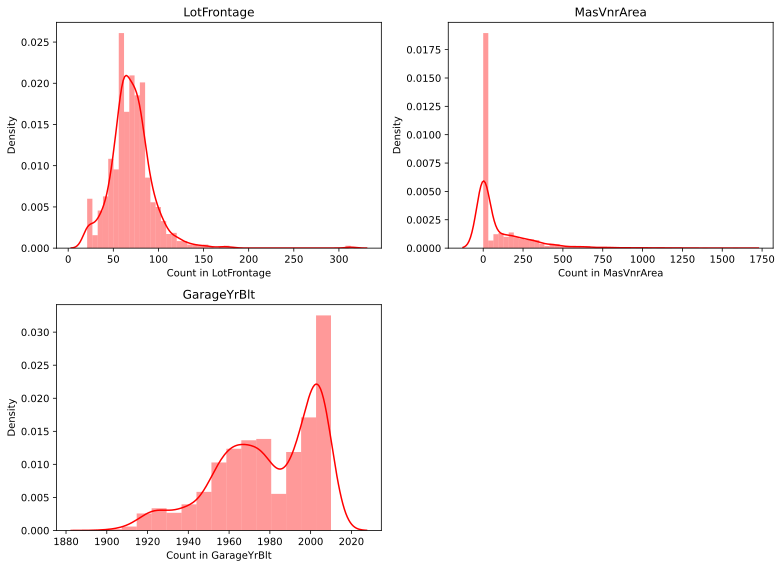

In [15]:
Numerical_Na_Columns = [i for i in df_train.columns if df_train[i].isnull().any() and df_train[i].dtype != 'object']
print("Numerical Columns in data with NaN values are:", Numerical_Na_Columns)

num_cols = 2
num_rows = int(np.ceil(len(Numerical_Na_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 4 * num_rows))
axes = axes.flatten()


for i, col in enumerate(Numerical_Na_Columns):
    sns.distplot(df_train[col], color='Red', ax=axes[i])
    axes[i].set_xlabel(f'Count in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  


for j in range(len(Numerical_Na_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [17]:
df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean(), inplace=True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean(), inplace=True)
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0], inplace=True)

Categorical Columns in data with NaN values are: ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


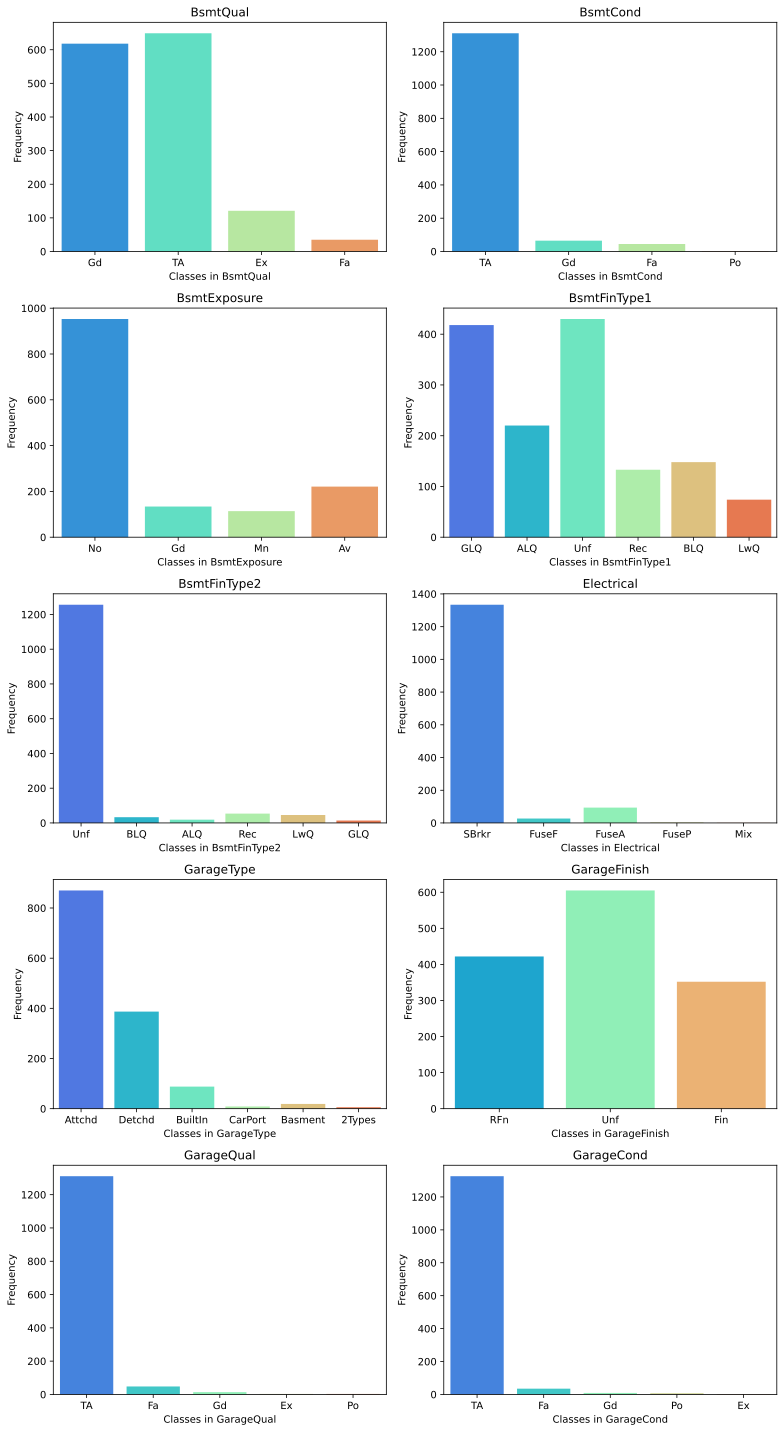

In [19]:
Categorical_Na_Columns = [i for i in df_train.columns if df_train[i].isnull().any() and df_train[i].dtype == 'object']
print("Categorical Columns in data with NaN values are:", Categorical_Na_Columns)

num_cols = 2
num_rows = int(np.ceil(len(Categorical_Na_Columns) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 4 * num_rows))
axes = axes.flatten()


for i, col in enumerate(Categorical_Na_Columns):
    sns.countplot(x = df_train[col], palette = 'rainbow', ax=axes[i])
    axes[i].set_xlabel(f'Classes in {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  


for j in range(len(Categorical_Na_Columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:
columns_to_fill = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                   'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtFinType2']
for column in columns_to_fill:
    df_train[column].fillna(df_train[column].mode()[0], inplace=True)

# Exploring and Preprocessing Testing Data

In [24]:
df_test = pd.read_csv('test.csv')

In [26]:
df_test = df_test.drop(columns = ['Id','Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC','Fence','MiscFeature'])

Numerical Columns in test data with NaN values are: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


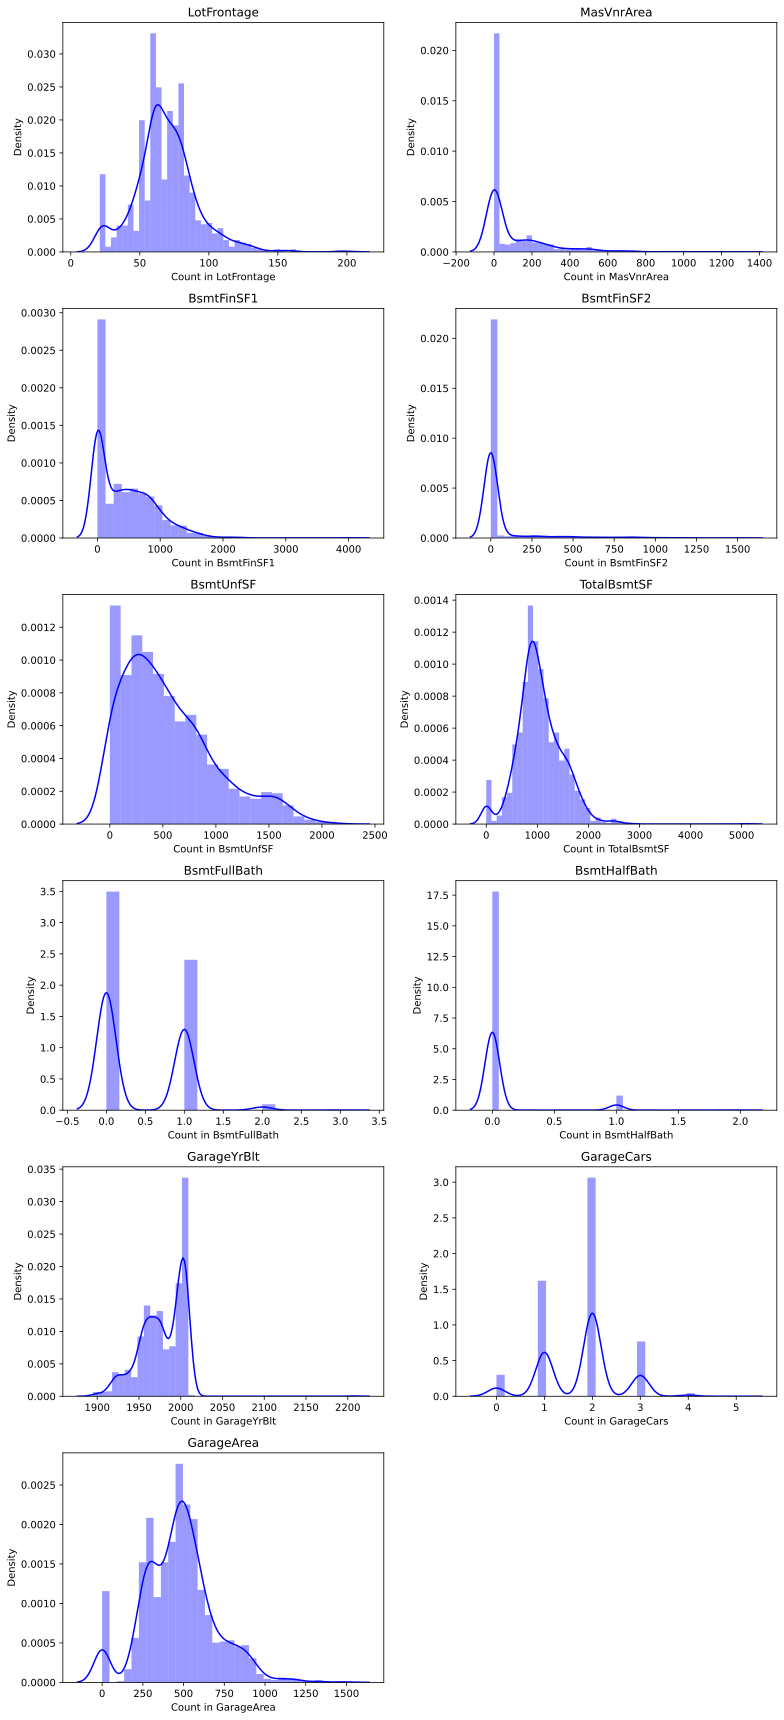

In [28]:
Numerical_Na_Columns_in_test = [i for i in df_test.columns if df_test[i].isnull().any() and df_test[i].dtype != 'object']
print("Numerical Columns in test data with NaN values are:", Numerical_Na_Columns_in_test)

num_cols = 2
num_rows = int(np.ceil(len(Numerical_Na_Columns_in_test) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 4 * num_rows))
axes = axes.flatten()


for i, col in enumerate(Numerical_Na_Columns_in_test):
    sns.distplot(df_test[col], color='Blue', ax=axes[i])
    axes[i].set_xlabel(f'Count in {col}')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=0)  


for j in range(len(Numerical_Na_Columns_in_test), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [30]:
df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean(), inplace=True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean(), inplace=True)
df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean(), inplace=True)
df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean(), inplace=True)
df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean(), inplace=True)
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean(), inplace=True)
df_test['GarageArea'].fillna(df_test['GarageArea'].mean(), inplace=True)

In [32]:
df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0], inplace=True)
df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0], inplace=True)
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0], inplace=True)
df_test['GarageCars'].fillna(df_test['GarageCars'].mode()[0], inplace=True)

Categorical Columns in test data with NaN values are: ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']


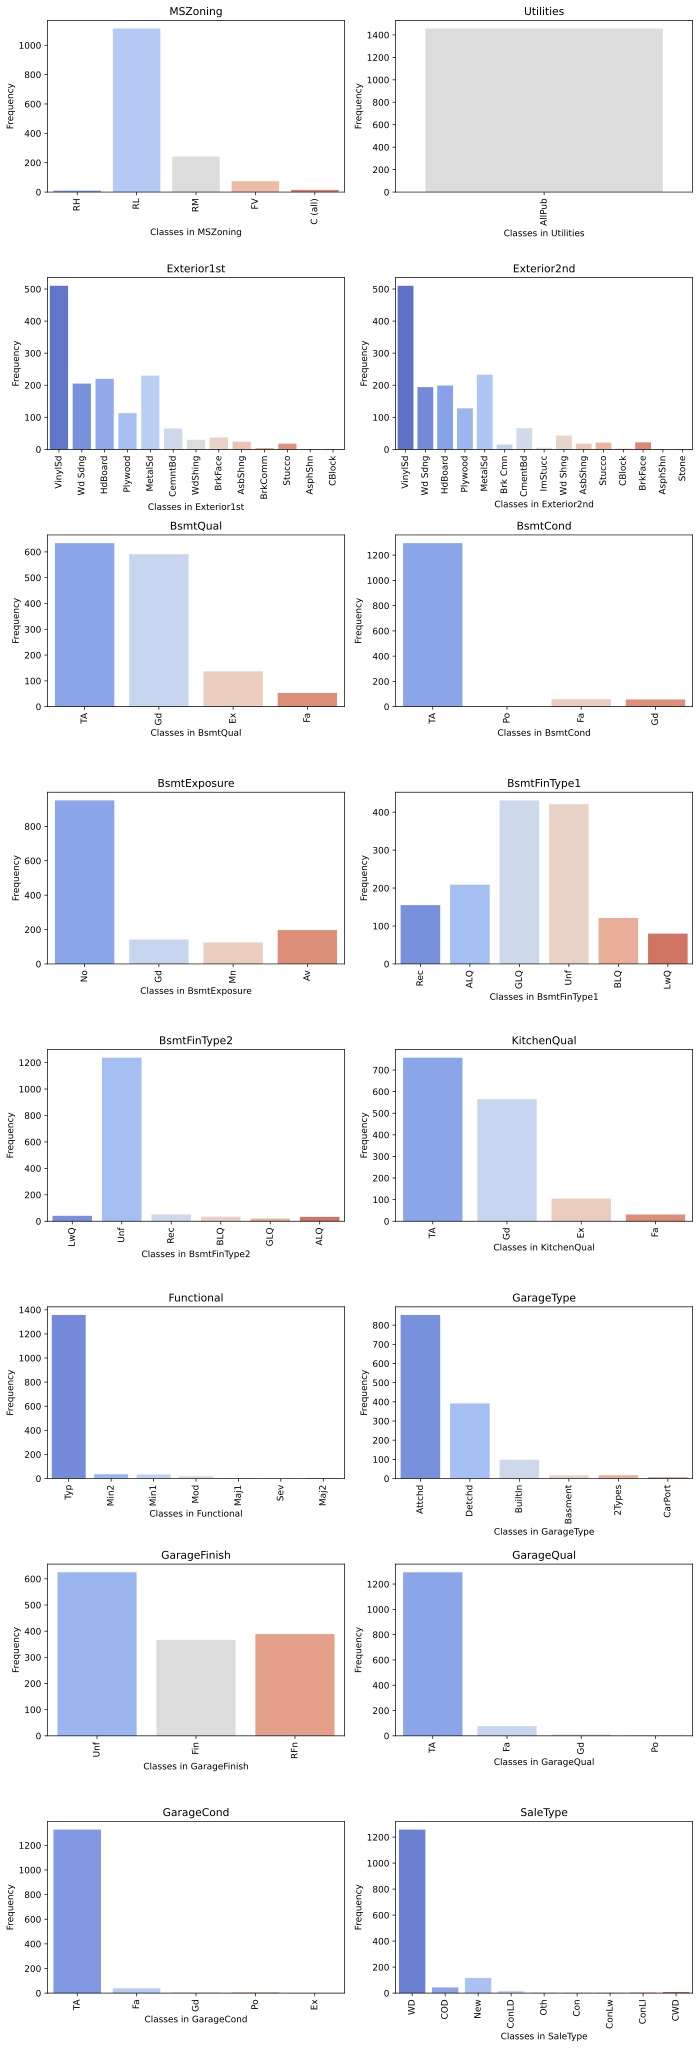

In [34]:
Categorical_Na_Columns_in_test = [i for i in df_test.columns if df_test[i].isnull().any() and df_test[i].dtype == 'object']
print("Categorical Columns in test data with NaN values are:", Categorical_Na_Columns_in_test)

num_cols = 2
num_rows = int(np.ceil(len(Categorical_Na_Columns_in_test) / num_cols))  


fig, axes = plt.subplots(num_rows, num_cols, figsize=(11, 4 * num_rows))
axes = axes.flatten()


for i, col in enumerate(Categorical_Na_Columns_in_test):
    sns.countplot(x = df_test[col], palette = 'coolwarm', ax=axes[i])
    axes[i].set_xlabel(f'Classes in {col}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=90)  


for j in range(len(Categorical_Na_Columns_in_test), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [36]:
columns_to_fill_in_test = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                           'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 
                           'GarageCond', 'SaleType']
for column in columns_to_fill_in_test:
    df_test[column].fillna(df_test[column].mode()[0], inplace=True)

# Encoding Both Training and Testing Data

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    label_encoders[col] = le


    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f'Mapped for {col}: {mapping}')

Mapped for MSZoning: {'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4}
Mapped for Street: {'Grvl': 0, 'Pave': 1}
Mapped for LotShape: {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}
Mapped for LandContour: {'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}
Mapped for Utilities: {'AllPub': 0, 'NoSeWa': 1}
Mapped for LotConfig: {'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
Mapped for LandSlope: {'Gtl': 0, 'Mod': 1, 'Sev': 2}
Mapped for Neighborhood: {'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}
Mapped for Condition1: {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}
Mapped for Condition2: {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA'

# Preprocessing Both Training and Testing Data

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols)
    ], remainder='passthrough')

# Model Building

In [45]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [47]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

#### Deifining X_train and y_train varaible as independent and dependent variable.

In [50]:
X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

## Model Pipiline Overview

In [53]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', 'passthrough',
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object'))])),
                ('model', RandomForestRegressor(random_state=42))])

#### Feature Importances in Random Forest

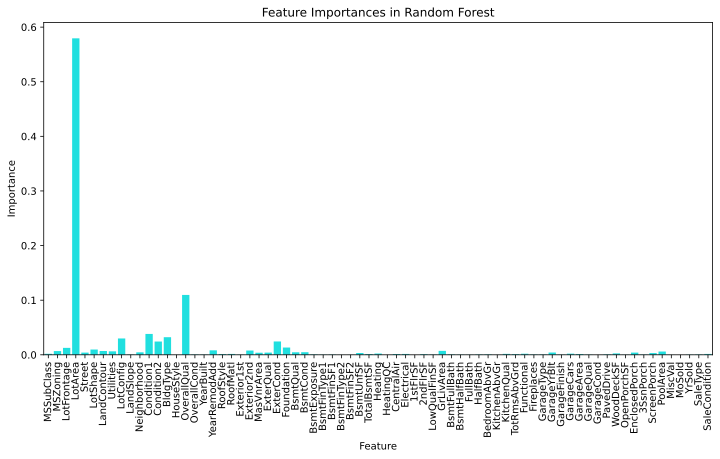

In [56]:
importances = pipeline.named_steps['model'].feature_importances_
features = X_train.columns

plt.figure(figsize=(12, 6))
sns.barplot(y=importances, x=features,color='cyan')
plt.title('Feature Importances in Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tick_params(axis='x', rotation=90) 
plt.show()

## Model Prediction for Testing Data

In [59]:
df_test['SalePrice'] = pipeline.predict(df_test)

In [61]:
df_test[['SalePrice']].to_csv('predictions.csv', index=False)

# Model Evaluation

In [64]:
X_train_eval = X_train
y_train_eval = y_train

In [66]:
y_train_pred = pipeline.predict(X_train_eval)

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_train_eval, y_train_pred)
mae = mean_absolute_error(y_train_eval, y_train_pred)
r2 = r2_score(y_train_eval, y_train_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 123803058.1948169
Mean Absolute Error: 6477.500376712329
R^2 Score: 0.9803698734277518


# Model Summary

| **Metric**               | **Value**           | **Interpretation**                                                                                                                                                 |
|--------------------------|---------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Mean Squared Error (MSE)** | 123,803,058.19     | MSE measures the average squared difference between the actual and predicted values. A high value indicates large errors, but is expected due to the squared nature. |
| **Mean Absolute Error (MAE)** | 6,477.50          | MAE measures the average magnitude of errors in predictions, showing the average error is about 6,477.50. It's easier to interpret since it's in the same unit as the target variable. |
| **R-squared (R²) Score**    | 0.9804              | R² indicates that 98.04% of the variance in `SalePrice` is explained by the model's features, suggesting a very strong fit. High R² may indicate potential overfitting. |


- The model has a high R² score, which shows that it captures most of the variance in the training data.
- The MAE suggests that, on average, the model's predictions are off by about 6,477.50, which is reasonable depending on the range of house prices.
- The MSE is large due to the nature of the metric, but it's typical in regression tasks where the target variable has large numeric values.
- Given the very high R², it's crucial to evaluate the model on the test set to check for overfitting and ensure it generalizes well to unseen data.


## Comparison of SalePrice Distributions Between Training and Test Data

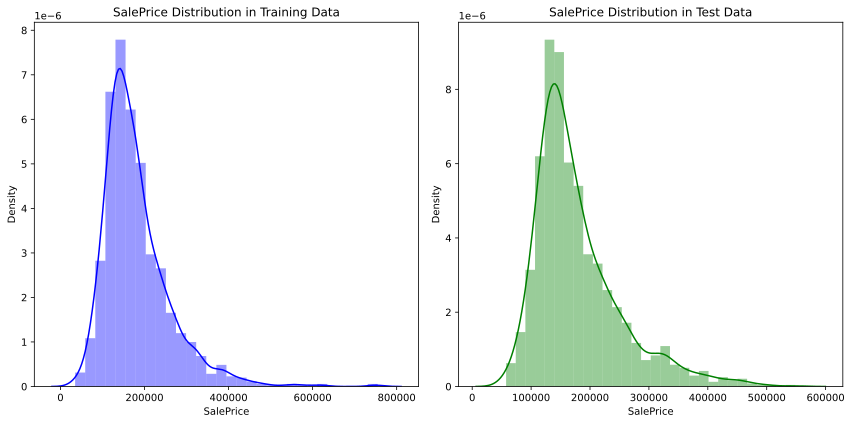

In [72]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('predictions.csv')


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(df_train['SalePrice'], color='blue', bins=30)
plt.title('SalePrice Distribution in Training Data')

plt.subplot(1, 2, 2)
sns.distplot(df_test['SalePrice'], color='green', bins=30)
plt.title('SalePrice Distribution in Test Data')

plt.tight_layout()
plt.show()

# Visualizing the Random Forest

In [ ]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz


def visualize_tree(tree, feature_names):

    dot_data = export_graphviz(tree, out_file=None, 
                               feature_names=feature_names,  
                               class_names=None,  
                               filled=True, rounded=True,  
                               special_characters=True)  

    graph = graphviz.Source(dot_data)  

    graph.render('decision_tree', format='png', cleanup=True)
    return graph

first_tree = pipeline.named_steps['model'].estimators_[0]

graph = visualize_tree(first_tree, X_train.columns)
graph

# Reference Taken 

1. https://www.google.com/url?sa=i&url=https%3A%2F%2Fserokell.io%2Fblog%2Frandom-forest-classification&psig=AOvVaw3u7acJLF37ln7GA_dNxF6j&ust=1724681794498000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCMClqYawkIgDFQAAAAAdAAAAABAE
2. https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40theclickreader%2Frandom-forest-regression-explained-with-implementation-in-python-3dad88caf165&psig=AOvVaw2xg79bewfT-EkG0pmbMI_1&ust=1724681849302000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCKj06dyqkIgDFQAAAAAdAAAAABAE